In [17]:
%matplotlib inline
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

# Perceptron

## Load Data

In [34]:
# load iris_train.data and iris_test.data
pd_train = pd.read_csv("data/iris/iris_train.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])
pd_test = pd.read_csv("data/iris/iris_test.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])

# parse the features and labels as numpy arrays.
X_train = pd_train.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_train = pd_train.as_matrix(columns=["label"]).ravel()
X_test = pd_test.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_test = pd_test.as_matrix(columns=["label"]).ravel()

# Encode labels
le = preprocessing.LabelEncoder()
le.fit(y_train)
print(le.classes_)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

['Iris-setosa' 'Iris-versicolor']


## Z-scoring

In [35]:
zscoring = True
if zscoring:
    mu = X_train.mean(axis=0)
    sigma = X_train.std(axis=0)
    X_train = np.divide(X_train-mu, sigma)
    X_test = np.divide(X_test-mu, sigma)

## Features

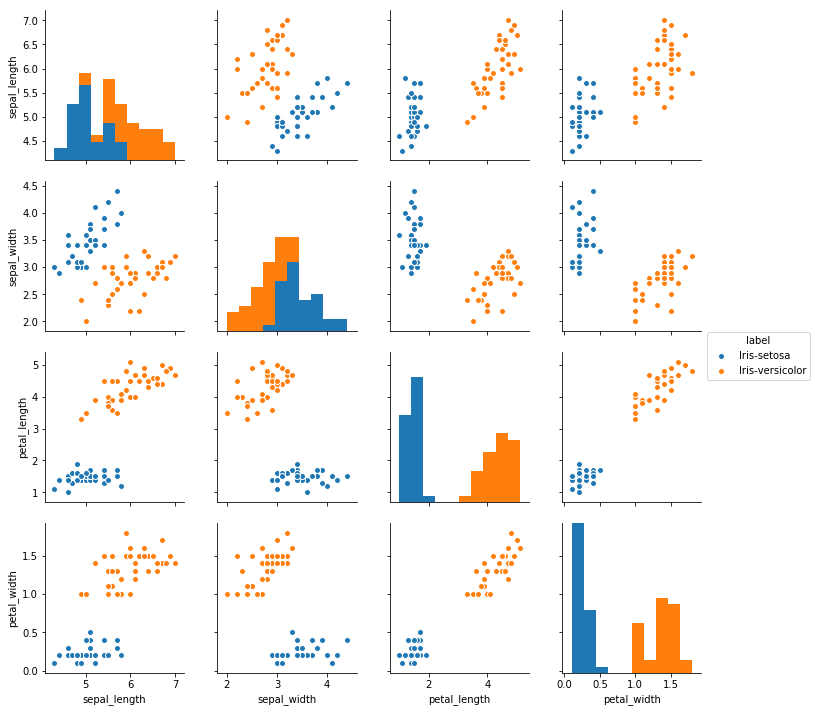

In [37]:
g = sns.pairplot(pd_train, hue="label")

### As we can see clearly these classes are linearly separable using these features.

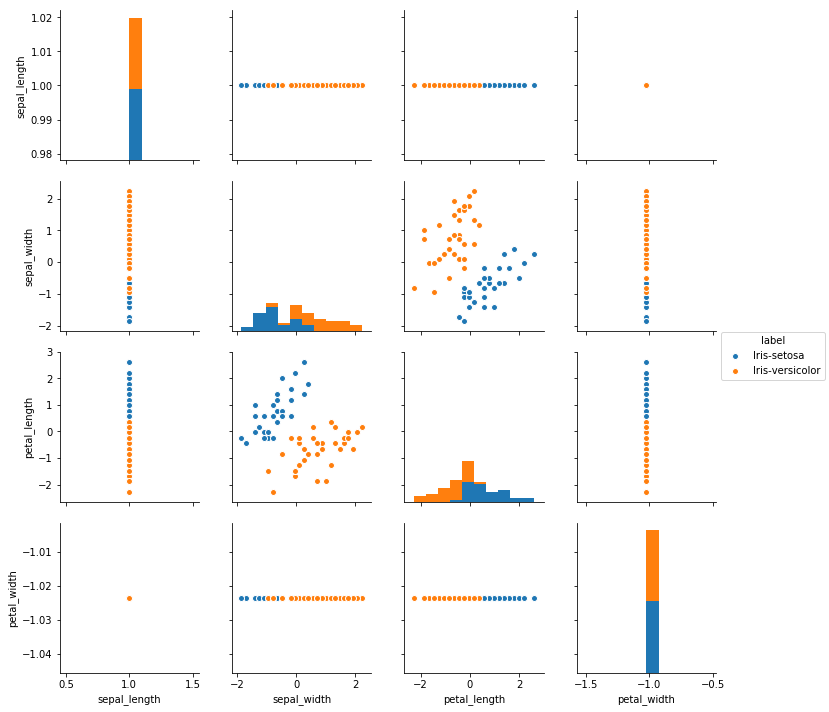

In [45]:
pd_train['sepal_length'] = X_train[:,0]
pd_train['sepal_width'] = X_train[:,1]
pd_train['petal_length'] = X_train[:,2]
pd_train['petal_width'] = X_train[1,3]
g = sns.pairplot(pd_train, hue="label")

## Train perceptron

In [38]:
X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))

In [15]:
w = np.random.random(size=(X_train.shape[1],))
lr = 0.01
thresh = 0.00001
while True:
    delta = y_train-X_train.dot(w)
    if abs(delta.sum())<thresh:
        break
    else:
        w += lr*np.mean(np.multiply(delta.reshape(-1,1),X_train), axis=0)

## Test perceptron

In [16]:
prediction = X_test.dot(w)
prediction[prediction>0.5] = 1
prediction[prediction<=0.5] = 0
print(classification_report(prediction, y_test))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        15
        1.0       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        30

